In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [7]:
# Load the data
df = pd.read_csv('../Belajar_ML/OnlineRetailfix.csv')
df

,InvoiceNo,Description,UnitPrice,CustomerID,Country,Category,Unnamed: 6
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,56250.0,17850,United Kingdom,Cafe,NaN
1,536365,WHITE METAL LANTERN,8250.0,17850,United Kingdom,Cafe,NaN
2,536365,CREAM CUPID HEARTS COAT HANGER,89250.0,17850,United Kingdom,Baju,NaN
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,127500.0,17850,United Kingdom,Travel,NaN
4,536365,RED WOOLLY HOTTIE WHITE HEART.,127500.0,17850,United Kingdom,Travel,NaN
...,...,...,...,...,...,...,...
1101,21995,Fujifilm Finepix 30i,2985000.0,18011,United Kingdom,Kamera,NaN
1102,21996,Fujifilm FinePix 3800,5985000.0,12433,Norway,Kamera,NaN
1103,21997,Fujifilm FinePix F10 Zoom,2685000.0,13467,United Kingdom,Kamera,NaN
1104,21998,Fujifilm FinePix F410 Zoom,2535000.0,13552,United Kingdom,Kamera,NaN


In [8]:
# Dataset information
print("There are {} rows and {} columns".format(df.shape[0],df.shape[1]))
print("\n====================================================")
print("Missing Values:\n", df.isnull().sum())
print("\n====================================================")
print("Categories Counts:\n", df['Category'].value_counts())

There are 1106 rows and 7 columns

Missing Values:
 InvoiceNo         0
Description       0
UnitPrice         0
CustomerID        0
Country           0
Category          0
Unnamed: 6     1106
dtype: int64

Categories Counts:
 Hobi            324
Dapur           193
Cafe            169
Baju            143
Elektronik      115
Travel          102
Musik            20
Transportasi     20
Kamera           20
Name: Category, dtype: int64


In [9]:
# Mapping the labels to numeric
df['Category'] = df['Category'].map({
    'Dapur': 0,
    'Cafe': 1,
    'Hobi': 2,
    'Elektronik': 3,
    'Travel': 4,
    'Baju': 5,
    'Musik': 6,
    'Transportasi': 7,
    'Kamera': 8
})

df

,InvoiceNo,Description,UnitPrice,CustomerID,Country,Category,Unnamed: 6
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,56250.0,17850,United Kingdom,1,NaN
1,536365,WHITE METAL LANTERN,8250.0,17850,United Kingdom,1,NaN
2,536365,CREAM CUPID HEARTS COAT HANGER,89250.0,17850,United Kingdom,5,NaN
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,127500.0,17850,United Kingdom,4,NaN
4,536365,RED WOOLLY HOTTIE WHITE HEART.,127500.0,17850,United Kingdom,4,NaN
...,...,...,...,...,...,...,...
1101,21995,Fujifilm Finepix 30i,2985000.0,18011,United Kingdom,8,NaN
1102,21996,Fujifilm FinePix 3800,5985000.0,12433,Norway,8,NaN
1103,21997,Fujifilm FinePix F10 Zoom,2685000.0,13467,United Kingdom,8,NaN
1104,21998,Fujifilm FinePix F410 Zoom,2535000.0,13552,United Kingdom,8,NaN


In [10]:
# Split the dataset into train and test sets
y = tf.keras.utils.to_categorical(df['Category'].values, num_classes=9)
X_train, X_test, Y_train, Y_test = train_test_split(df['Description'], y, test_size=0.2, random_state=42)

In [11]:
# Preprocessing the text
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [12]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print(len(word_index))
print(word_index)

987
{'<OOV>': 1, 'set': 2, 'red': 3, 'of': 4, 'heart': 5, 'retrospot': 6, 'white': 7, 'christmas': 8, 'bag': 9, 't': 10, 'vintage': 11, 'warmer': 12, 'water': 13, 'bottle': 14, 'hand': 15, 'hot': 16, 'design': 17, 'light': 18, 'cake': 19, 'pack': 20, 'holder': 21, 'pink': 22, 'box': 23, 'black': 24, 'blue': 25, 'small': 26, '6': 27, '3': 28, 'cases': 29, 'metal': 30, 'polkadot': 31, 'mug': 32, 'tea': 33, 'with': 34, 'kit': 35, 'jumbo': 36, 'lights': 37, '2': 38, 'union': 39, 'jam': 40, 'in': 41, 'paper': 42, 'coffee': 43, 'hanging': 44, 'lunch': 45, 'wooden': 46, 'glass': 47, 'feltcraft': 48, 'jack': 49, 'bird': 50, 'assorted': 51, 'kitchen': 52, 'silver': 53, 'paisley': 54, 'and': 55, 'clock': 56, 'love': 57, 'sign': 58, 'making': 59, '60': 60, 'fairy': 61, 'cream': 62, 'boxes': 63, 'tin': 64, 'frame': 65, 'card': 66, 'ribbons': 67, '12': 68, 'star': 69, 'babushka': 70, 'wood': 71, 'spaceboy': 72, 'edwardian': 73, 'cosy': 74, 'party': 75, 'candles': 76, 'magic': 77, 'wicker': 78, 'cha

In [13]:
# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(X_train)
maxlen = max([len(x) for x in sequences])
padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

In [14]:
# Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post', truncating='post')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics='accuracy')

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("val_accuracy") > 0.85):
            self.model.stop_training = True

# Summary of the model
model.summary()

# Train the model
history = model.fit(padded, Y_train, validation_data=(test_padded, Y_test), callbacks=myCallback(), epochs=100)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 21, 64)            63232     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 512)               33280     
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 9)                 4617      
                                                      

28/28 [==============================] - 0s 12ms/step - loss: 0.2764 - accuracy: 0.8620 - val_loss: 1.6966 - val_accuracy: 0.6486
Epoch 50/100
28/28 [==============================] - 0s 11ms/step - loss: 0.2884 - accuracy: 0.8620 - val_loss: 1.6984 - val_accuracy: 0.6532
Epoch 51/100
28/28 [==============================] - 0s 11ms/step - loss: 0.2687 - accuracy: 0.8654 - val_loss: 1.7249 - val_accuracy: 0.6622
Epoch 52/100
28/28 [==============================] - 0s 11ms/step - loss: 0.2777 - accuracy: 0.8756 - val_loss: 1.7265 - val_accuracy: 0.6577
Epoch 53/100
28/28 [==============================] - 0s 11ms/step - loss: 0.2665 - accuracy: 0.8688 - val_loss: 1.7767 - val_accuracy: 0.6486
Epoch 54/100
28/28 [==============================] - 0s 11ms/step - loss: 0.2797 - accuracy: 0.8654 - val_loss: 1.7096 - val_accuracy: 0.6622
Epoch 55/100
28/28 [==============================] - 0s 11ms/step - loss: 0.2737 - accuracy: 0.8586 - val_loss: 1.7861 - val_accuracy: 0.6712
Epoch 56/100

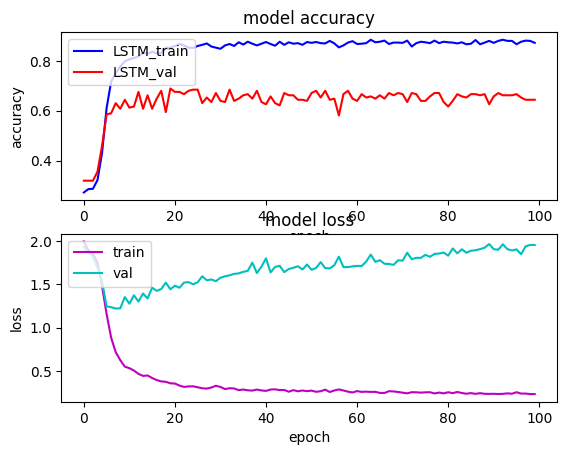

In [16]:
import matplotlib.pyplot as plt

s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [17]:
scores = model.predict(test_padded).round()
print(scores)

7/7 [==============================] - 0s 4ms/step
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n\n",confusion_matrix(Y_test.argmax(axis=1),scores.argmax(axis=1)))
print("\n")
print("Classification Report:\n\n",classification_report(Y_test.argmax(axis=1), scores.argmax(axis=1)))

Confusion Matrix:

 [[22  3  5  0  0  3  0  0  0]
 [ 7 16  2  3  0  0  0  0  0]
 [11  3 44  2  6  5  0  0  0]
 [ 2  2  4 14  2  0  0  1  0]
 [ 0  1  2  4 14  1  0  0  0]
 [ 3  2  2  2  2 19  0  0  0]
 [ 2  0  0  1  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0  0  4]]


Classification Report:

               precision    recall  f1-score   support

           0       0.47      0.67      0.55        33
           1       0.59      0.57      0.58        28
           2       0.75      0.62      0.68        71
           3       0.54      0.56      0.55        25
           4       0.58      0.64      0.61        22
           5       0.68      0.63      0.66        30
           6       1.00      0.50      0.67         6
           7       0.75      1.00      0.86         3
           8       1.00      1.00      1.00         4

    accuracy                           0.63       222
   macro avg       0.71      0.69      0.68       222
weighted avg       0.65      0.6

In [21]:
def ubah_text(text):
    sequences = tokenizer.texts_to_sequences([text])
    maxlen = 21
    padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
    
    return padded

In [24]:
text = "mug"
preprocessed_text = ubah_text(text)
print(preprocessed_text)

[[32  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [25]:
coba  = model.predict(preprocessed_text)
if coba.argmax() == [0]:
    coba = "Dapur"
elif coba.argmax() == [1]:
    coba = "Kafe"
elif coba.argmax() == [2]:
    coba = "Hobi"
elif coba.argmax() == [3]:
    coba = "Elektronik"
elif coba.argmax() == [4]:
    coba = "Travel"
elif coba.argmax() == [5]:
    coba = "Baju"
elif coba.argmax() == [6]:
    coba = "Musik"
elif coba.argmax() == [7]:
    coba = "Transportasi"
elif coba.argmax() == [8]:
    coba = "Kamera"
print(coba)

1/1 [==============================] - 0s 26ms/step
Kafe


In [ ]:
# Save the model
import pickle

pickle.dump(model, open('model_tf.pkl', 'wb'))
pickle.dump(X_train, open("X_train.pkl", "wb"))